# **Import important packages**

In [1]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 27.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib
import os


In [3]:
df1 = pd.read_csv('https://drive.usercontent.google.com/download?id=1BbDlmHASPgkegPcPJfkZEX81sjW3xB2D&export=download&authuser=1&confirm=t&uuid=468306dc-b957-4266-8123-aea6dea04e3b&at=AO7h07eN7IQZT0ZdDQXpOLGMrkzu:1725304530682')

In [4]:
df1

,text,label
0,the Better Perth group has blamed online shopp...,0
1,the Tigers have been without a home for six ye...,0
2,Mae cais cynllunio amlinellol wedi ei gymeradwyo,1
3,Age UK has warned that the lack of support for...,1
4,fracturing three vertebrae in his back in the ...,0
...,...,...
19995,al-Shabab militants stormed the shopping centr...,0
19996,"Ciarán Maxwell, 30, has been charged with one ...",0
19997,the men were found guilty of staging a pre-arr...,0
19998,"in the UK is by C-section, while in Cyprus the...",0


In [5]:
df1 = df1.rename(columns={'text': 'Text'})
df1 = df1.rename(columns={'label': 'labels'})

In [6]:
# Count the number of NaN values before dropping them
num_nan_values_before = df1['Text'].isna().sum()

#show the number of NaN values in the dataset
print(num_nan_values_before)

# Drop NaN values from 'clean_text' column
df1 = df1.dropna(subset=['Text'])


3


there is 4 nan records in the dataset by they had been droped from the dataset

The sentences length is between 0-200 words and the average is 50 words

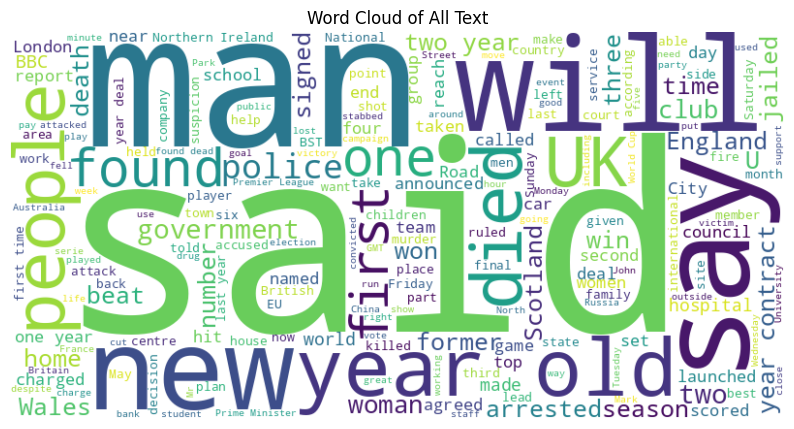

In [7]:
# Word Cloud
all_text = ' '.join(df1['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Text')
plt.show()

# **Split the dataset**

In [8]:
# First split: 75% training, 25% remaining
train_df, temp_df = train_test_split(df1, test_size=0.25, random_state=42)

# Second split: 40% of the remaining 25% for validation (0.4 * 0.25 = 0.10) and 60% for test (0.6 * 0.25 = 0.15)
val_df, test_df = train_test_split(temp_df, test_size=0.6, random_state=42)

# Print the shapes of train_df, val_df, and test_df
print("Train DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)
print("Test DataFrame shape:", test_df.shape)

# Combine training and validation sets for final training
train_val_df = pd.concat([train_df, val_df])


Train DataFrame shape: (14997, 2)
Validation DataFrame shape: (2000, 2)
Test DataFrame shape: (3000, 2)


Configring, Training and testing the model

# **Training BERT Model**

In [21]:


# Print the shapes of train_val_df and test_df
print("Train + Validation DataFrame shape:", train_val_df.shape)
print("Test DataFrame shape:", test_df.shape)

# Logging setup
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=5,
                                output_dir='./outputs/',
                                overwrite_output_dir=True,
                                evaluate_during_training=True,
                                save_best_model=True)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'google-bert/bert-base-uncased',
    num_labels=2,
    args=model_args
)

Train + Validation DataFrame shape: (17000, 2)
Test DataFrame shape: (3000, 2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
# Train the model on the combined training and validation set
model.train_model(train_val_df, eval_df=val_df)

# Evaluate the model on the test set
result, model_outputs, wrong_predictions = model.eval_model(test_df)

# Print evaluation results
print("Evaluation results:", result)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/34 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 5:   0%|          | 0/2125 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 5:   0%|          | 0/2125 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 5:   0%|          | 0/2125 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 4 of 5:   0%|          | 0/2125 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 5 of 5:   0%|          | 0/2125 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/6 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Evaluation results: {'mcc': 0.0, 'accuracy': 0.4866666666666667, 'f1_score': 0.3273542600896861, 'tp': 1460, 'tn': 0, 'fp': 1540, 'fn': 0, 'auroc': 0.41230141433908557, 'auprc': 0.4230108124623988, 'eval_loss': 0.69349218805631}


In [23]:
result

{'mcc': 0.0,
 'accuracy': 0.4866666666666667,
 'f1_score': 0.3273542600896861,
 'tp': 1460,
 'tn': 0,
 'fp': 1540,
 'fn': 0,
 'auroc': 0.41230141433908557,
 'auprc': 0.4230108124623988,
 'eval_loss': 0.69349218805631}

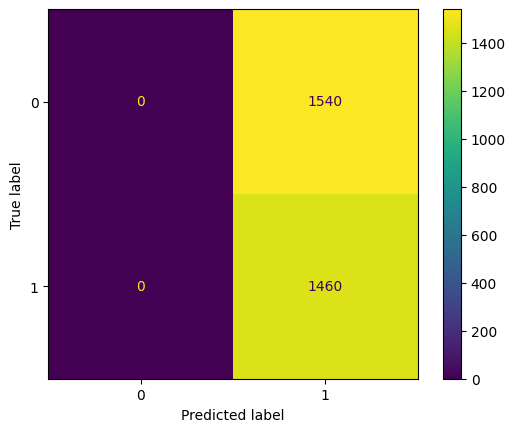

In [24]:
prediction= model_outputs.argmax(axis=1)
true_labels = test_df['labels'].values
ConfusionMatrixDisplay.from_predictions(true_labels, prediction)
plt.show()



```
# This is formatted as code
```

#**Training Bigram-logistic regression model**

In [9]:
# Vectorize the text using TfidfVectorizer with trigrams
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
X_train = vectorizer.fit_transform(train_val_df['Text'])
X_test = vectorizer.transform(test_df['Text'])

y_train = train_val_df['labels']
y_test = test_df['labels']

In [10]:
# Train a classifier (Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test)

# Print evaluation results
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1531
           1       0.85      0.78      0.82      1469

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



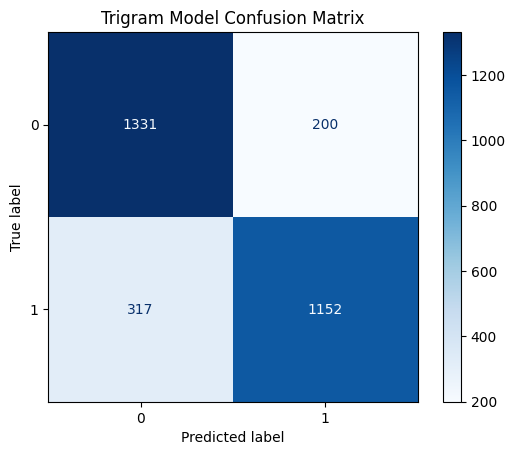

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

disp.plot(cmap=plt.cm.Blues)
plt.title('Trigram Model Confusion Matrix')
plt.show()

#**Training Trigram-logistic regression model**

In [12]:
# Vectorize the text using TfidfVectorizer with trigrams
vectorizer = TfidfVectorizer(ngram_range=(3, 3))
X_train = vectorizer.fit_transform(train_val_df['Text'])
X_test = vectorizer.transform(test_df['Text'])

y_train = train_val_df['labels']
y_test = test_df['labels']

In [13]:
# Train a classifier (Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test)

# Print evaluation results
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80      1531
           1       0.82      0.71      0.76      1469

    accuracy                           0.78      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.79      0.78      0.78      3000



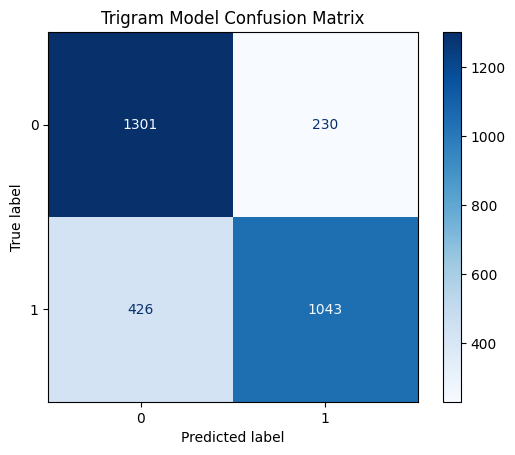

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

disp.plot(cmap=plt.cm.Blues)
plt.title('Trigram Model Confusion Matrix')
plt.show()

Training Logistic Regression...
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1531
           1       0.86      0.84      0.85      1469

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



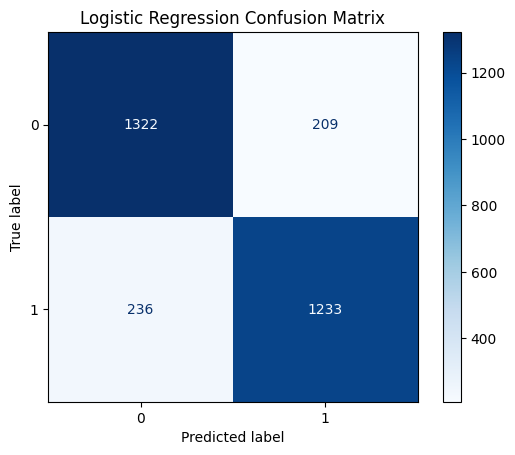

Size of Logistic Regression model: 0.002665 GB
Training Multinomial Naive Bayes...
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      1531
           1       0.75      0.90      0.82      1469

    accuracy                           0.81      3000
   macro avg       0.82      0.81      0.80      3000
weighted avg       0.82      0.81      0.80      3000



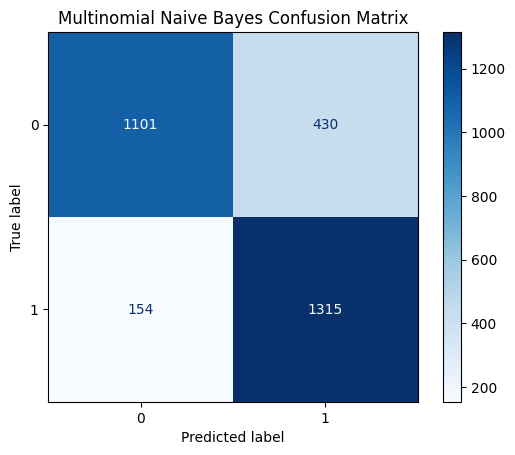

Size of Multinomial Naive Bayes model: 0.010658 GB
Training K-Nearest Neighbors...
Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.77      0.64      0.70      1531
           1       0.68      0.80      0.74      1469

    accuracy                           0.72      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.72      0.72      3000



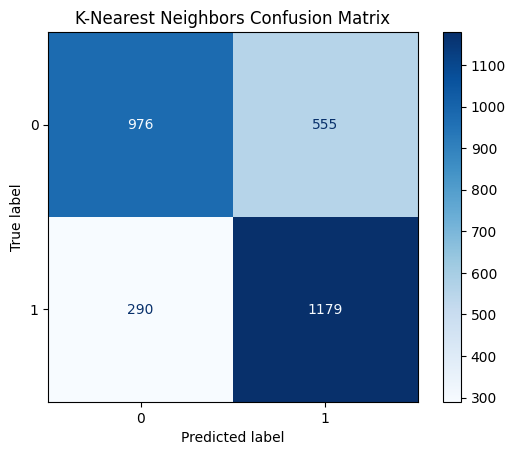

Size of K-Nearest Neighbors model: 0.009211 GB


In [15]:
# Vectorize the text using TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Using unigrams, bigrams, and trigrams
X_train = vectorizer.fit_transform(train_val_df['Text'])
X_test = vectorizer.transform(test_df['Text'])

y_train = train_val_df['labels']
y_test = test_df['labels']

# Define a dictionary of models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Save the model to a file
    model_filename = f"{name.replace(' ', '_')}_model.joblib"
    joblib.dump(model, model_filename)

    # Get the size of the model file in GB
    model_size_bytes = os.path.getsize(model_filename)
    model_size_gb = model_size_bytes / (1024 ** 3)
    print(f"Size of {name} model: {model_size_gb:.6f} GB")

In [16]:
# First split: 75% training, 25% remaining
train_df, temp_df = train_test_split(df1, test_size=0.25, random_state=42)

# Second split: 40% of the remaining 25% for validation (0.4 * 0.25 = 0.10) and 60% for test (0.6 * 0.25 = 0.15)
val_df, test_df = train_test_split(temp_df, test_size=0.6, random_state=42)

# Print the shapes of train_df, val_df, and test_df
print("Train DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)
print("Test DataFrame shape:", test_df.shape)

Train DataFrame shape: (14997, 2)
Validation DataFrame shape: (2000, 2)
Test DataFrame shape: (3000, 2)


In [17]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_val_df['Text'])

X_train = tokenizer.texts_to_sequences(train_val_df['Text'])
X_test = tokenizer.texts_to_sequences(test_df['Text'])
X_val = tokenizer.texts_to_sequences(val_df['Text'])

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
X_val = pad_sequences(X_val, maxlen=100)

y_train = train_val_df['labels']
y_test = test_df['labels']
y_val = val_df['labels']

In [18]:
# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_val = encoder.transform(y_val)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [19]:
# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [20]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
# Model Training
history = model.fit(
    X_train, y_train,
    epochs=6,
    batch_size=64,
    validation_data=(X_val, y_val),  # Ensure you provide this
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy}')

Epoch 1/6
266/266 ━━━━━━━━━━━━━━━━━━━━ 55s 182ms/step - accuracy: 0.7420 - loss: 0.5016 - val_accuracy: 0.9085 - val_loss: 0.2446 - learning_rate: 0.0010
Epoch 2/6
266/266 ━━━━━━━━━━━━━━━━━━━━ 77s 176ms/step - accuracy: 0.9056 - loss: 0.2518 - val_accuracy: 0.9410 - val_loss: 0.1759 - learning_rate: 0.0010
Epoch 3/6
266/266 ━━━━━━━━━━━━━━━━━━━━ 82s 178ms/step - accuracy: 0.9366 - loss: 0.1774 - val_accuracy: 0.9655 - val_loss: 0.1164 - learning_rate: 0.0010
Epoch 4/6
266/266 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.9538 - loss: 0.1267 - val_accuracy: 0.9750 - val_loss: 0.0761 - learning_rate: 0.0010
Epoch 5/6
266/266 ━━━━━━━━━━━━━━━━━━━━ 48s 179ms/step - accuracy: 0.9693 - loss: 0.0896 - val_accuracy: 0.9870 - val_loss: 0.0433 - learning_rate: 0.0010
Epoch 6/6
266/266 ━━━━━━━━━━━━━━━━━━━━ 46s 174ms/step - accuracy: 0.9765 - loss: 0.0686 - val_accuracy: 0.9905 - val_loss: 0.0357 - learning_rate: 0.0010
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8740 - loss: 0.4368
Te

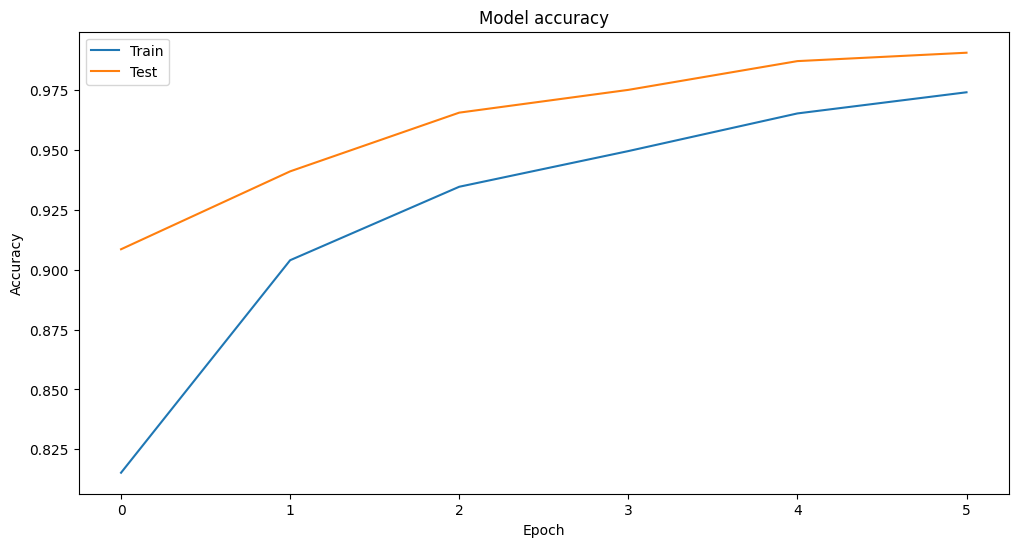

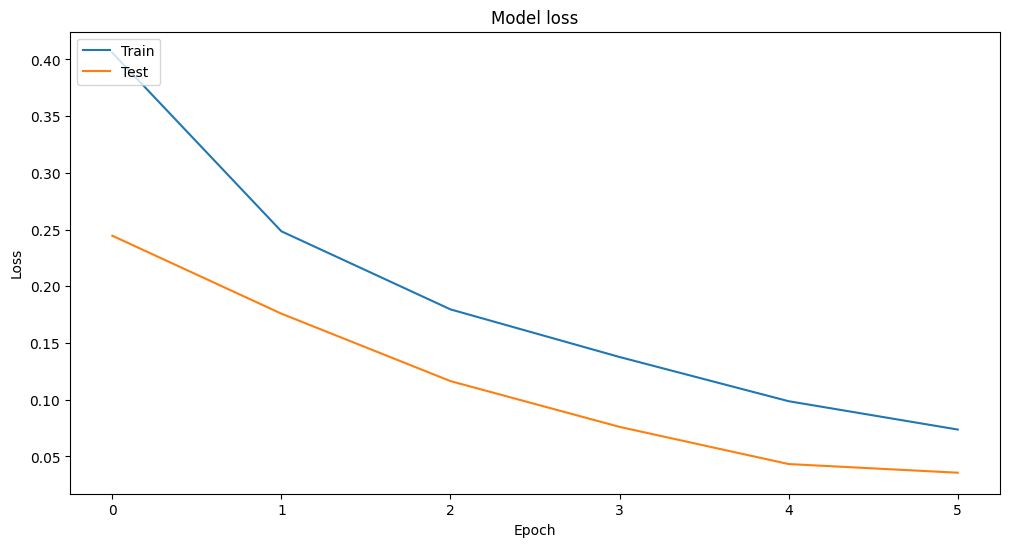

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
# Print the model size
def get_model_size(model):
    total_size = 0
    for layer in model.layers:
        weights = layer.get_weights()
        for weight in weights:
            total_size += np.prod(weight.shape) * 4  # Each weight is a float32 (4 bytes)
    return total_size / (1024 ** 2)  # Convert to MB

print(f'Model Size: {get_model_size(model):.2f} MB')

Model Size: 2.79 MB


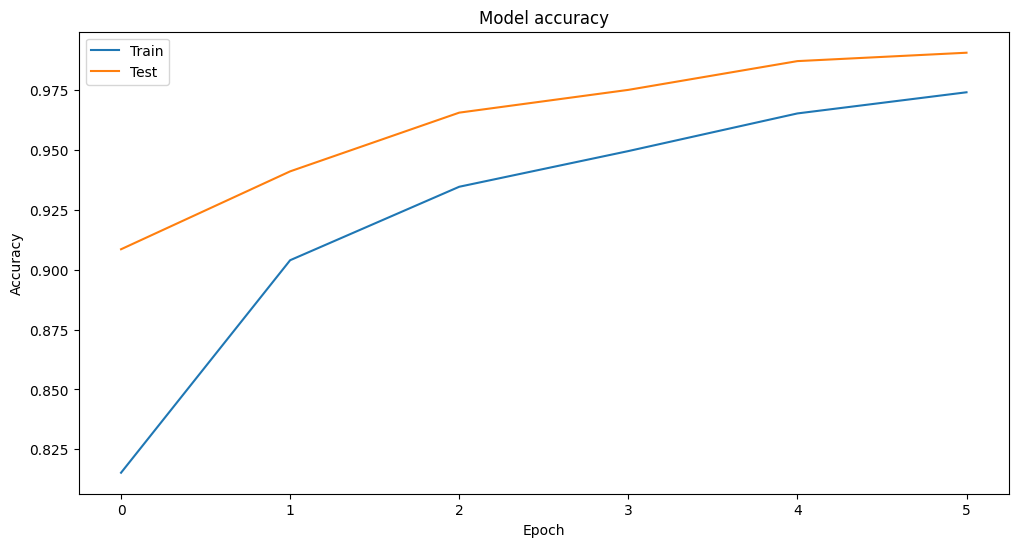

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



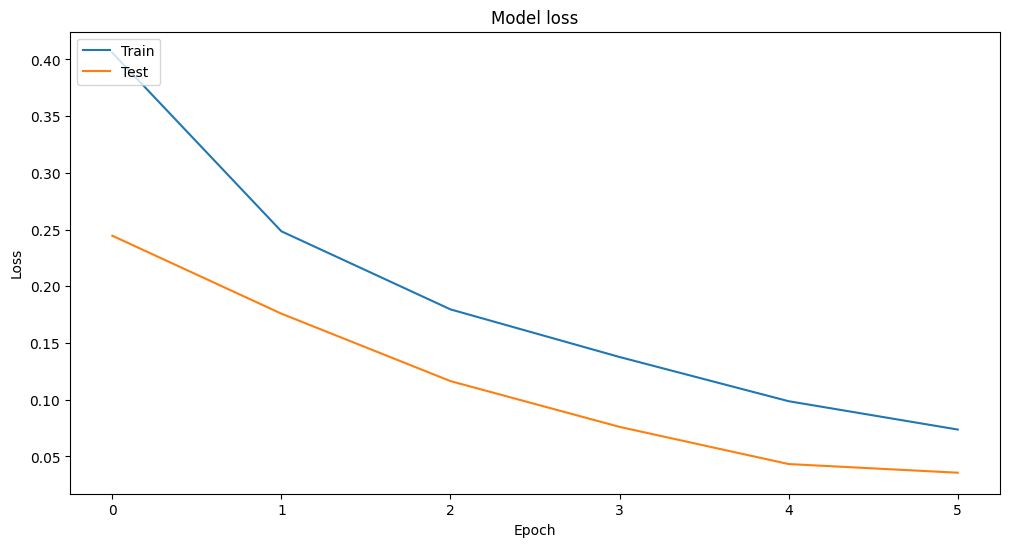

In [25]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


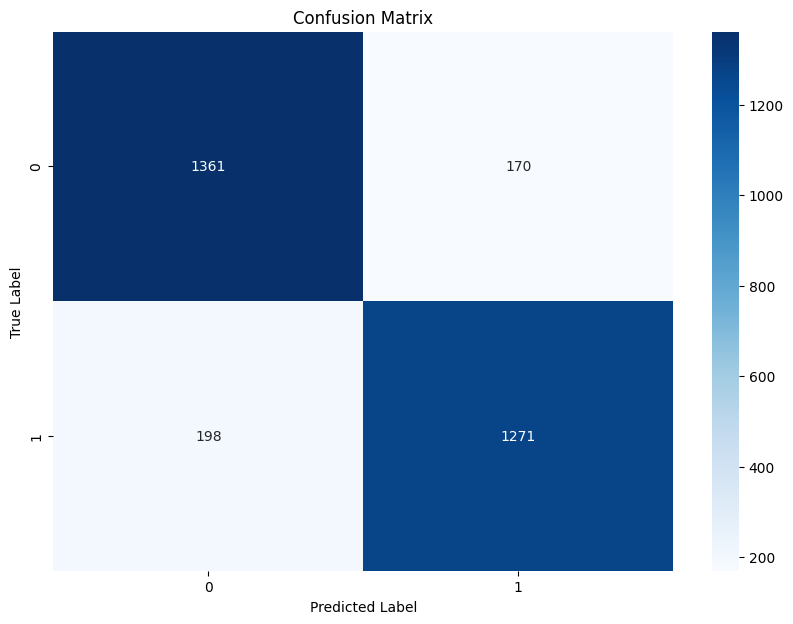

In [26]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

